In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create DataFrame for the vine_table data
vine_df = pd.read_csv("Resources/vine_table.csv")
vine_df.head(10)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,R10010D6B1QM7U,1,0,0,N,Y
1,R100BI61LIKH2N,5,1,2,N,Y
2,R100TPJCYDYGBU,3,1,2,N,Y
3,R1018OO9U6UUWO,5,0,0,N,Y
4,R102YIWZEIAXT9,5,2,4,N,N
5,R1034S7FA21OI1,5,2,2,N,Y
6,R103LC8CTAHWZ6,2,1,1,N,Y
7,R103PT7S4HRIP8,2,0,0,N,Y
8,R104RCQZYPYDXS,5,7,8,N,N
9,R105KZIXHZW63W,5,1,1,N,Y


In [3]:
# Filter to retrieve all the rows where the total_votes count is equal to or greater than 20
votes_over_20_df = vine_df.loc[vine_df["total_votes"] >= 20]
votes_over_20_df

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
114,R10BI5JXAMQGOJ,5,21,22,N,N
140,R10SVK8D3H27ZF,1,212,286,N,N
149,R10XDST2ZRGM74,3,28,38,N,N
181,R11A18VIPVGKIK,5,21,24,N,N
190,R11FN2LIELX63N,2,4,23,N,N
...,...,...,...,...,...,...
1785663,RWS5NFT86P4AA,5,17,20,N,Y
1785742,RY4X8UBZKHSWN,5,7,31,N,N
1785809,RYY6J6S7SN9AL,5,46,61,N,Y
1785810,RYZZWUJMW9CY3,5,19,29,N,N


In [4]:
# Filter to retrieve all the rows where the number of helpful_votes divided by total_votes is equal to or greater than 50%.
helpful_over_50_df = votes_over_20_df.loc[(votes_over_20_df["helpful_votes"]/votes_over_20_df["total_votes"]) >= 0.5]
helpful_over_50_df

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
114,R10BI5JXAMQGOJ,5,21,22,N,N
140,R10SVK8D3H27ZF,1,212,286,N,N
149,R10XDST2ZRGM74,3,28,38,N,N
181,R11A18VIPVGKIK,5,21,24,N,N
247,R127VLRNG6O61F,4,30,32,N,N
...,...,...,...,...,...,...
1785565,RVEMQSTX3HWFH,1,15,24,N,N
1785663,RWS5NFT86P4AA,5,17,20,N,Y
1785809,RYY6J6S7SN9AL,5,46,61,N,Y
1785810,RYZZWUJMW9CY3,5,19,29,N,N


In [5]:
# Filter to retrieves all the rows where a review was written as part of the Vine program (paid), vine == 'Y'
paid_df = helpful_over_50_df.loc[helpful_over_50_df["vine"] == "Y"]
paid_df

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
5267,R24PS9N276OXF4,5,241,262,Y,N
100611,R3EPHK0JGQGE91,5,21,28,Y,N
102512,R3T4LTJ189G0LT,4,37,45,Y,N
122711,RKG407AVAZXBQ,3,22,25,Y,N
159174,RNU8PK609WT6P,4,347,362,Y,N
...,...,...,...,...,...,...
1729930,REAX2MY43TDPR,2,19,23,Y,N
1737135,R1X29HLKI4XO6C,4,331,357,Y,N
1747247,RCOQQGUKAE6L1,5,29,29,Y,N
1755532,R29NYQS1ZI0S9M,2,38,45,Y,N


In [6]:
# Filter to retrieve all the rows where the review was not part of the Vine program (unpaid), vine == 'N'
unpaid_df = helpful_over_50_df.loc[helpful_over_50_df["vine"] == "N"]
unpaid_df

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
114,R10BI5JXAMQGOJ,5,21,22,N,N
140,R10SVK8D3H27ZF,1,212,286,N,N
149,R10XDST2ZRGM74,3,28,38,N,N
181,R11A18VIPVGKIK,5,21,24,N,N
247,R127VLRNG6O61F,4,30,32,N,N
...,...,...,...,...,...,...
1785565,RVEMQSTX3HWFH,1,15,24,N,N
1785663,RWS5NFT86P4AA,5,17,20,N,Y
1785809,RYY6J6S7SN9AL,5,46,61,N,Y
1785810,RYZZWUJMW9CY3,5,19,29,N,N


In [7]:
# Total number of reviews
total_paid_reviews = paid_df["review_id"].count()
total_unpaid_reviews = unpaid_df["review_id"].count()

In [8]:
# Total number of 5-star reviews
total_paid_5star = paid_df.loc[paid_df["star_rating"] == 5].count()["review_id"]
total_unpaid_5star = unpaid_df.loc[unpaid_df["star_rating"] == 5].count()["review_id"]

In [9]:
# Percentage of 5-star reviews for reviews paid_5star_percentage
paid_5star_percentage = total_paid_5star / total_paid_reviews * 100
unpaid_5star_percentage = total_unpaid_5star / total_unpaid_reviews * 100

In [10]:
# Create a summary DataFrame
summary_df = pd.DataFrame(
    [{"Total Reviews": total_paid_reviews, 
      "Total 5-Star": total_paid_5star, 
      "% 5-Star": paid_5star_percentage}, 
     {"Total Reviews": total_unpaid_reviews, 
      "Total 5-Star": total_unpaid_5star, 
      "% 5-Star": unpaid_5star_percentage}], 
    index = ["Paid (Vine)", "Unpaid"])

summary_df

,Total Reviews,Total 5-Star,% 5-Star
Paid (Vine),94,48,51.063830
Unpaid,40471,15663,38.701786


In [11]:
# Format the summary_df
summary_df["Total Reviews"] = summary_df["Total Reviews"].map("{:,.0f}".format)
summary_df["Total 5-Star"] = summary_df["Total 5-Star"].map("{:,.0f}".format)
summary_df["% 5-Star"] = summary_df["% 5-Star"].map("{:,.2f}".format)
summary_df

,Total Reviews,Total 5-Star,% 5-Star
Paid (Vine),94,48,51.06
Unpaid,"40,471","15,663",38.70


In [12]:
# Group by the DataFrame with star-rating
paid_star_group = paid_df.groupby(paid_df["star_rating"]).count()["review_id"]
unpaid_star_group = unpaid_df.groupby(unpaid_df["star_rating"]).count()["review_id"].astype("int64")
paid_star_group_per = paid_star_group / total_paid_reviews * 100
unpaid_star_group_per = unpaid_star_group / total_unpaid_reviews * 100

In [13]:
# Create a summary DataFrame for grouped data
summary_by_star_df = pd.DataFrame({"Paid Reviews": paid_star_group,
                                   "Unpaid Reviews":unpaid_star_group,
                                   "% Paid Reviews": paid_star_group_per, 
                                   "% Unpaid Reviews": unpaid_star_group_per})
summary_by_star_df

,Paid Reviews,Unpaid Reviews,% Paid Reviews,% Unpaid Reviews
star_rating,,,,
1,1,10303,1.063830,25.457735
2,5,3388,5.319149,8.371426
3,16,4379,17.021277,10.820093
4,24,6738,25.531915,16.648959
5,48,15663,51.063830,38.701786


In [14]:
# Format the summary_by_star_df
summary_by_star_df.index.name = None
summary_by_star_df["Unpaid Reviews"] = summary_by_star_df["Unpaid Reviews"].map("{:,.0f}".format)
summary_by_star_df["% Paid Reviews"] = summary_by_star_df["% Paid Reviews"].map("{:,.2f}".format)
summary_by_star_df["% Unpaid Reviews"] = summary_by_star_df["% Unpaid Reviews"].map("{:,.2f}".format)
summary_by_star_df

,Paid Reviews,Unpaid Reviews,% Paid Reviews,% Unpaid Reviews
1,1,"10,303",1.06,25.46
2,5,"3,388",5.32,8.37
3,16,"4,379",17.02,10.82
4,24,"6,738",25.53,16.65
5,48,"15,663",51.06,38.70


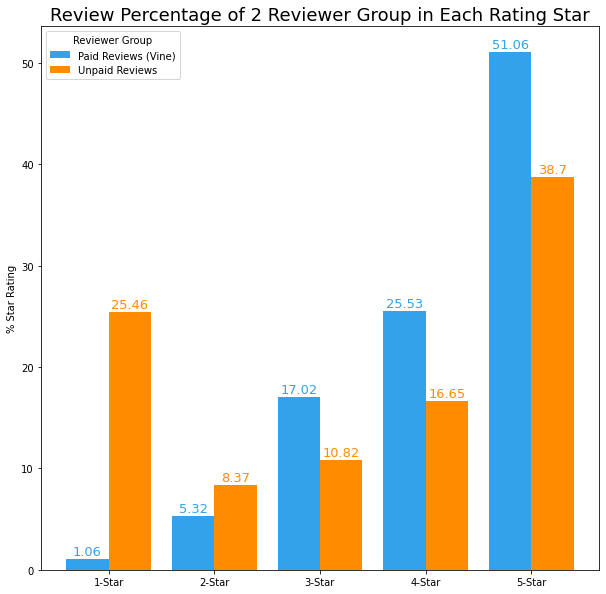

In [15]:
# Create a bar chart for comparision
labels = ['1-Star', '2-Star', '3-Star', '4-Star', '5-Star']

y1 = round(summary_by_star_df["% Paid Reviews"].astype("float"), 2)
y2 = round(summary_by_star_df["% Unpaid Reviews"].astype("float"), 2)

x = np.arange(len(labels)) 
width = 0.4  

fig, ax = plt.subplots(figsize = (10,10))
rects1 = plt.bar(x - width/2, y1, width, label= "Paid Reviews (Vine)", color= "#34a1eb")
rects2 = plt.bar(x + width/2, y2, width, label="Unpaid Reviews", color = "darkorange")

plt.ylabel("% Star Rating")
plt.title("Review Percentage of 2 Reviewer Group in Each Rating Star", fontsize=18)
plt.xticks(x, labels)
plt.legend(fontsize=10, title= "Reviewer Group")

ax.bar_label(rects1, padding=1, color = "#34a1eb", fontsize=13)
ax.bar_label(rects2, padding=1, color = "darkorange", fontsize=13)

# Save the figure
plt.savefig("Resources/Bias_summary.png")

# Display the figure
plt.show()